# MACHINE LEARNING INTERNSHIP (TASK 1) 

### Project Title: Predicting Flower Species ###

#### **Project Description** ####
In this project, you will create a simple machine learning model to
predict the species of flowers based on their features. You can use the famous Iris
dataset, which contains measurements of four features (sepal length, sepal width, petal
length, and petal width) for three different species of iris flowers (setosa, versicolor, and
virginica). 

#### **Feature Variables** ####

In the Iris dataset, there are four feature variables (also called independent variables or attributes) that represent various measurements of the iris flowers. These features are:

1. **Sepal Length (cm):** The length of the sepal (the outermost whorl of a flower) in centimeters.
2. **Sepal Width (cm):** The width of the sepal in centimeters.
3. **Petal Length (cm):** The length of the petal (the inner whorl of a flower) in centimeters.
4. **Petal Width (cm):** The width of the petal in centimeters.

These four numerical features are used to predict the target variable, which is the species of the iris flower. Each row in the dataset represents a specific iris flower, and the values in the columns corresponding to these feature variables describe the measurements of that particular flower. The target variable, or the class label, is the species of the iris flower, which can be one of three classes: setosa, versicolor, or virginica.

In summary, the feature variables in the Iris dataset are the sepal length, sepal width, petal length, and petal width, and these are used to predict the species of the iris flower.

### Background

### Scikit-learn

Scikit-learn is a machine learning library for the Python programming language. It features various classification, regression and clustering learning algorithms. 

### Dependencies

- pandas - To work with solid data-structures, n-dimensional matrices and perform exploratory data analysis.
- matplotlib - To visualize data using 2D plots.
- seaborn - To make 2D plots look pretty and readable.
- scikit-learn - To create machine learning models easily and make predictions.
- numpy - To work with arrays.

**A few things to note:**

- You'll need to install the various libraries before importing them ```(i.e. %pip install pandas)```
- You may need to restart the kernel to use updated packages.

# Obtain & Load Data

In [136]:
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [137]:
from sklearn import datasets

# Step 1: Load the Iris dataset
iris = datasets.load_iris()

# Create a DataFrame to view the data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [138]:
# Add the target column (species)
df['species'] = iris.target_names[iris.target]

In [139]:
df.shape

(150, 5)

In [140]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [141]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [142]:
# Use .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
# Count is the count of non-null observations (i.e. rows)
# Mean is the average of values for the given column
# Std is standard deviation - how far off from the mean the values are
# Min is the minimum amount of the value
# 25% is the 25th percentile 
# 50% is the 50th percentile
# 75% is the 75th percentile
# max is the maximum amount of the value
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Prepare & Preprocess Data

### Understand missing data that could skew the model

In [143]:
# Verify which features have missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## Use visualizations to understand the relationship of the target variable with other features

#### Histograms

Text(0.5, 0, 'Species')

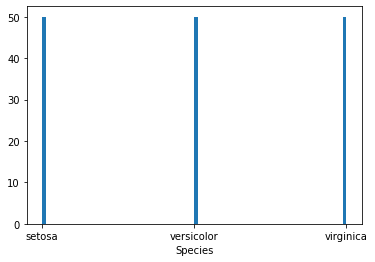

In [144]:
# bins->amount of columns
plt.hist(df['species'], bins=80)
plt.xlabel("Species")

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

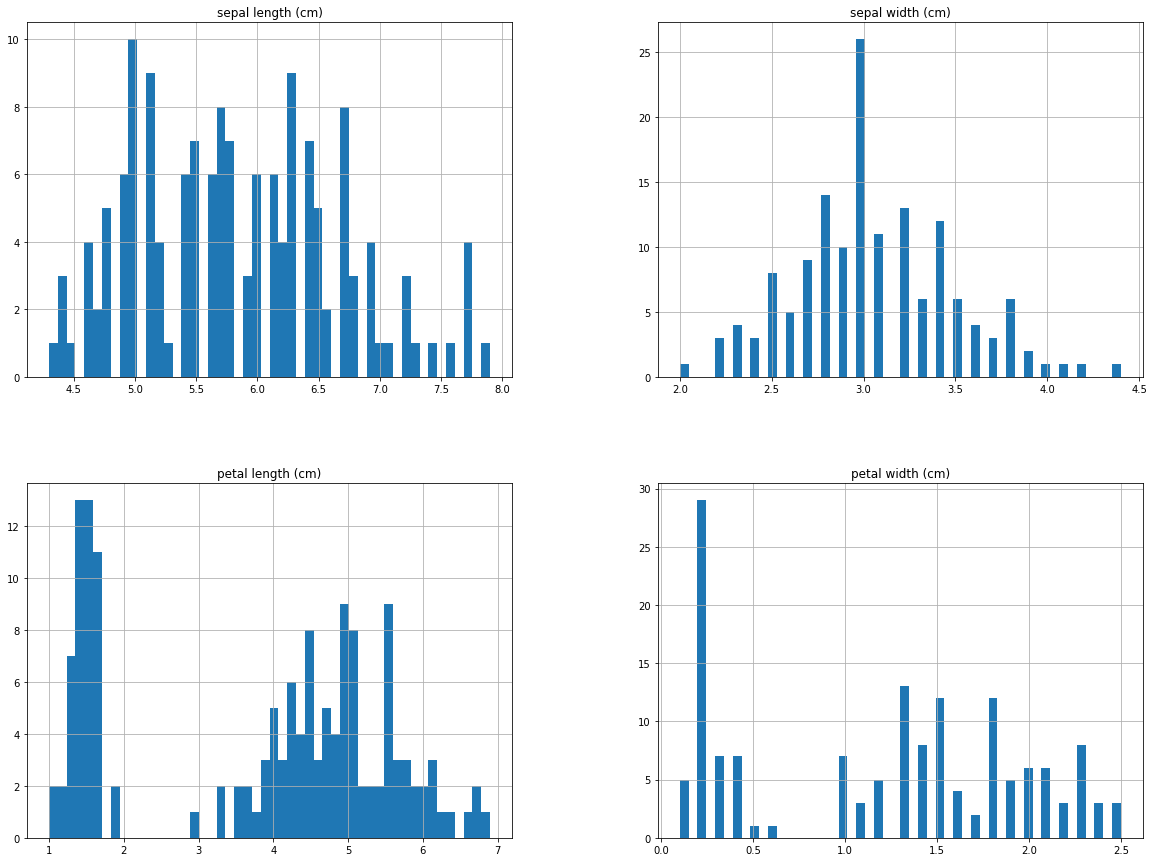

In [145]:
# let's do histograms for the all the features to understand the data distributions
df.hist(bins=50, figsize=(20,15))

#### Use a heatmap to show correlation

In [146]:
# Plot a graphical correlation matrix for each pair of columns in the dataframe
corr = df.corr(numeric_only=True) # data frame correlation function
print(corr)

                   sepal length (cm)  sepal width (cm)  petal length (cm)   
sepal length (cm)           1.000000         -0.117570           0.871754  \
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


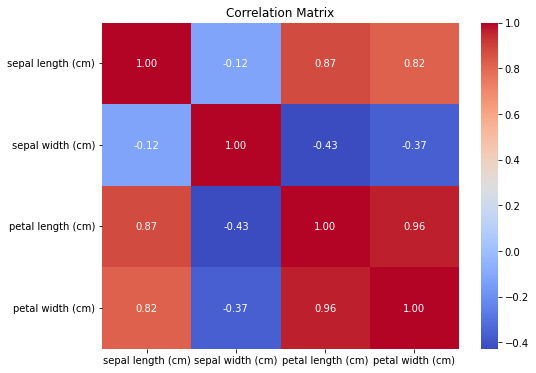

In [147]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Train the model

In [148]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Add the target column (species)
df['species'] = iris.target_names[iris.target]

# remove spaces from column names and convert all to lowercase and remove special characters as it could cause issues in the future
df.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in df.columns]

# Encode the categorical target variable (species)
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Split the dataset into features (X) and target variable (y)
X = df.drop('species', axis=1)  # Features
y = df['species']  # Target variable

print(X)

     sepal_length_(cm)  sepal_width_(cm)  petal_length_(cm)  petal_width_(cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


### Split training & test data

In [149]:
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


## Linear Regression - Model Training

In [150]:
# Use scikit-learn’s LinearRegression to train the model on both the training and evaluate it on the test sets
from sklearn.linear_model import LogisticRegression

# Create a Linear regressor using all the feature variables
reg_model = LogisticRegression()

# Train the model using the training sets
reg_model.fit(X_train.values, y_train.values)

LogisticRegression()

## Run the predictions

In [151]:
#run the predictions on the training and testing data
y_pred_test = reg_model.predict(X_test.values)

## Evaluate the model

In [152]:
#compare the actual values (ie, target) with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

pred_test_df

,Actual,Predicted
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


### Evaluate the model using the 𝑅^2 metric and Accuracy score

In [153]:
# Determine accuracy using 𝑅^2
# 𝑅^2 : R squared is another way to evaluate the performance of a regression model.
# 1, means that the model is perfect and 0 means the the model will perform poorly.
r2_reg_model_test = round(reg_model.score(X_test.values, y_test.values),2)

print("R^2 Test: {}".format(r2_reg_model_test))

R^2 Test: 1.0


In [154]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [155]:
# Display classification report (includes precision, recall, F1-score)
print(classification_report(y_test, y_pred_test, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Prediction

Example usage: Predict the species for a new data point

In [156]:
test_data = np.array([
    [5.0, 3.5, 1.5, 0.2],
    [6.3, 2.8, 5.1, 1.5],
    [4.9, 3.0, 1.4, 0.2],
    [6.0, 3.0, 4.8, 1.8],
    [5.8, 2.7, 5.1, 1.9]
])
predicted_species = reg_model.predict(test_data)

# Convert the predicted labels back to the original species names
predicted_species_names = iris.target_names[predicted_species]

# Display the test data and predicted species
for i in range(len(test_data)):
    print(f"Test Data Point {i + 1} Measurements: {test_data[i]}")
    print(f"Predicted Flower Species: {predicted_species_names[i]}")
    print()

Test Data Point 1 Measurements: [5.  3.5 1.5 0.2]
Predicted Flower Species: setosa

Test Data Point 2 Measurements: [6.3 2.8 5.1 1.5]
Predicted Flower Species: virginica

Test Data Point 3 Measurements: [4.9 3.  1.4 0.2]
Predicted Flower Species: setosa

Test Data Point 4 Measurements: [6.  3.  4.8 1.8]
Predicted Flower Species: virginica

Test Data Point 5 Measurements: [5.8 2.7 5.1 1.9]
Predicted Flower Species: virginica



### Visualization (Confusion Matrix)

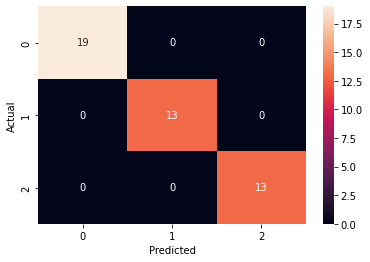

In [157]:
confusion = confusion_matrix(y_test, y_pred_test)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()